**Step 1: Import important libraries**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpt
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import time
import io

**Step 2: Upload File to Colab**

In [4]:
from google.colab import files
dataset =files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [5]:
supermarket = pd.read_csv(io.StringIO(dataset['supermarket_sales.csv'].decode('utf-8')))

**Step 3: Data Exploration** 

In [7]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

***Some variables by default such as the 'Date' variable is saved as object. We need to change the Dtype to datetime.***

In [9]:
supermarket['Date'] = pd.to_datetime(supermarket['Date'])

In [14]:
supermarket['Day'] = supermarket['Date'].dt.day
supermarket['Month'] = supermarket['Date'].dt.month
supermarket['Year'] = supermarket['Date'].dt.year

In [16]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


***Now, let us convert Time column to datetime object.***

In [17]:
supermarket['Time'] = pd.to_datetime(supermarket['Time'])

In [39]:
supermarket['Hour'] = supermarket['Time'].dt.hour

In [40]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

***Missing value analysis***

In [19]:
supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
dtype: int64

**Step 4: Data Analysis**

Text(0.5, 1.0, 'Busiest Branch')

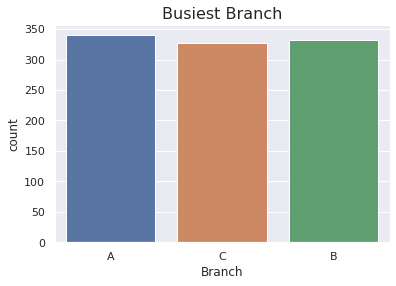

In [23]:
sns.set_theme(style='darkgrid')
sns.countplot(x="Branch",data=supermarket)
plt.title('Busiest Branch', size =16)

Text(0.5, 1.0, 'Member vs Non Member')

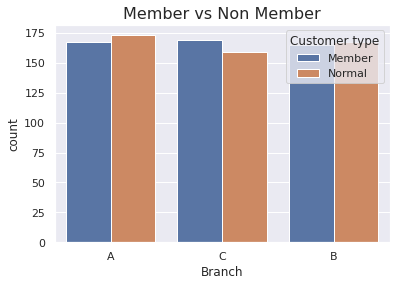

In [28]:
sns.set_theme(style='darkgrid')
sns.countplot(x="Branch", hue= "Customer type", data=supermarket)
plt.title('Member vs Non Member', size =16)

***Finding 1: The above figure shows Branch 'A' is the busiest branch among the three branches.***

Text(0.5, 1.0, 'Commonly used Payement Method')

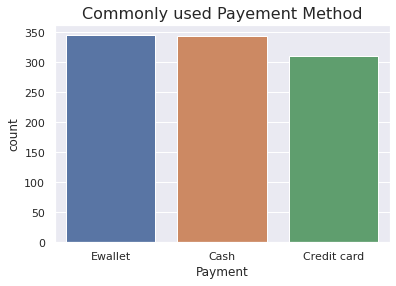

In [24]:
sns.set_theme(style='darkgrid')
sns.countplot(x="Payment",data=supermarket)
plt.title('Commonly used Payement Method', size =16)

***Finding 2: The above figure shows that Ewallet is the most commonly used payment method.***

Text(0.5, 1.0, 'Busiest City')

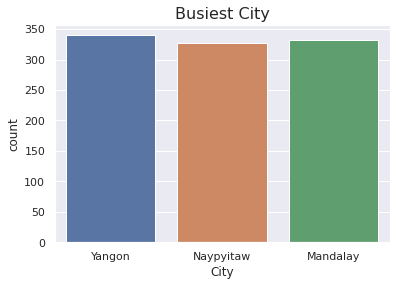

In [25]:
sns.set_theme(style='darkgrid')
sns.countplot(x="City",data=supermarket)
plt.title('Busiest City', size =16)

***Finding 3: The above figure shows that Yangon is the busiest city.***

Text(0.5, 1.0, 'Member vs Non Member')

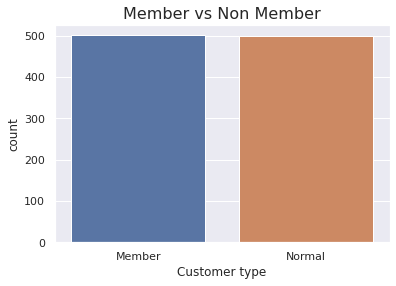

In [26]:
sns.set_theme(style='darkgrid')
sns.countplot(x="Customer type",data=supermarket)
plt.title('Member vs Non Member', size =16)

***Finding 4: The above figure shows that both Member and Non members are equally present.***

In [31]:
supermarket['Month'].unique()

array([1, 3, 2])

In [32]:
supermarket['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

Text(0.5, 1.0, 'Distribution of different Products')

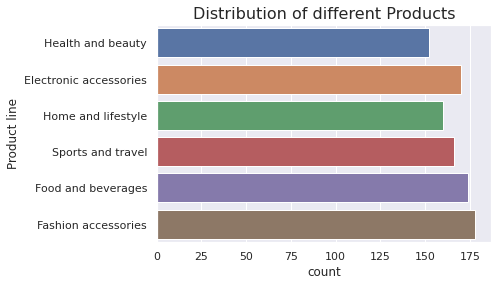

In [34]:
sns.set_theme(style='darkgrid')
sns.countplot(y="Product line",data=supermarket)
plt.title('Distribution of different Products', size =16)

Text(0.5, 1.0, 'Distribution of different Products')

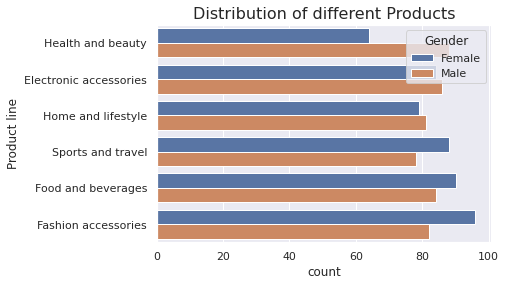

In [35]:
sns.set_theme(style='darkgrid')
sns.countplot(y="Product line",hue='Gender',data=supermarket)
plt.title('Distribution of different Products', size =16)

***Finding 5: Above figures show that overall Electronic Accessories is sold the maximum. Also, it was found that females buy more of Health and Beauty products than Men.***

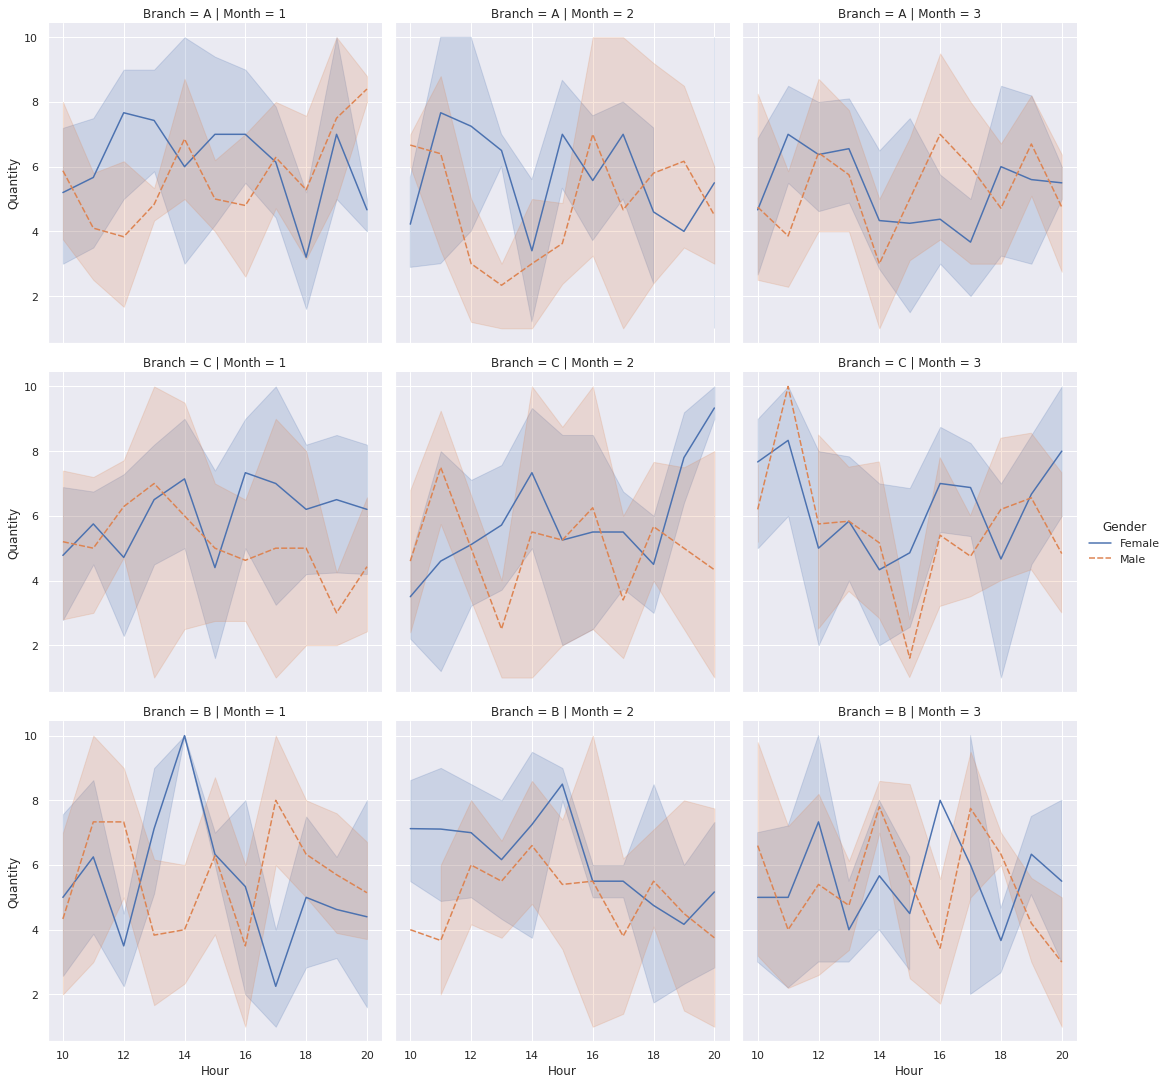

In [41]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'Month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =supermarket)

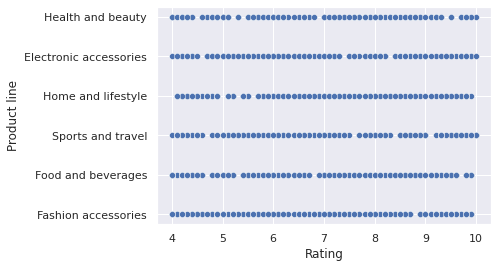

In [44]:
sns.scatterplot(x='Rating', y='Product line', data = supermarket)